# Classification of Cervical Cancer 
## Springboard Data Science Career Track
## Capstone Project -I 
### EDA Notebook by Soumyadip Kundu
### June 2022



### Problem Statement: Assessing the risk factors for succesful detection of Cervical cancer


### Data Source: Kaggle datasets

In [2]:
#Import libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 999)
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv('Cervical_cancer_data_kag_cleaned.csv')
df.head()

,Unnamed: 0,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0


In [4]:
df.shape

(763, 33)

In [5]:
#adding up all the cancer diag columns and making a new Target column called cancer:


for index, row in df.iterrows():
    df["cancer"] = df["Hinselmann"] + df["Schiller"] + df["Citology"] + df["Biopsy"]
        
df.head()

,Unnamed: 0,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,cancer
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


In [6]:
## Creating a conditional column 'cancer' which is an integrated column from 
#all the 4 tests ---> 1.0 when positive from any of the tests.


df["cancer"] = df.apply(lambda row: 0.0 if row.cancer == 0.0 else 1.0, axis=1)

df.head()

,Unnamed: 0,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,cancer
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


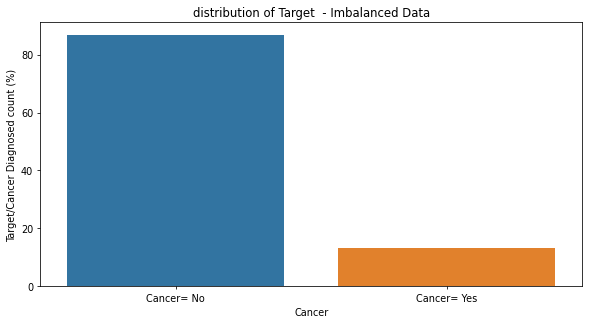

In [7]:
#Target Distribution:

c=df['cancer'].value_counts(normalize=True)

#plot:

plt.figure(figsize=(10,5), dpi=70)
sns.barplot(c.index, c.values*100)
plt.ylabel ('Target/Cancer Diagnosed count (%)')
plt.xlabel ('Cancer')
labels = ("Cancer= No", "Cancer= Yes")
plt.xticks([0,1], labels)
plt.title ('distribution of Target  - Imbalanced Data')
plt.show()

In [8]:
#Drop unnecessary columns:


df.drop(['Unnamed: 0', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1, inplace=True)
df.shape

(763, 29)

In [9]:
# Dividing the dataframe into two - cancer= 0/1:

df_can= df[df['cancer']==1]
df_nc= df[df['cancer']==0]

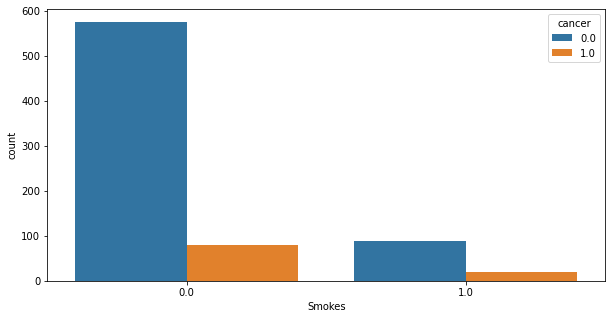

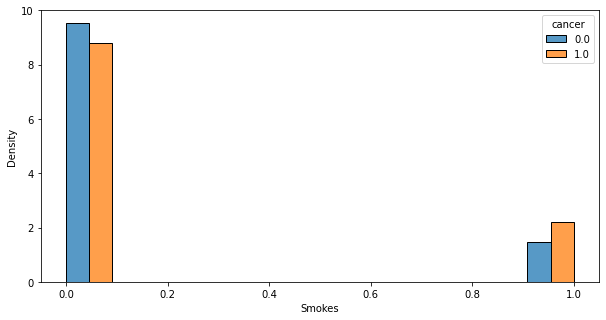

In [10]:
#Smoke:

plt.figure(figsize=(10,5))
sns.countplot(x=df['Smokes'], hue= df['cancer'])
plt.show()


plt.figure(figsize=(10,5))
sns.histplot(x = df['Smokes'], hue=df['cancer'], multiple="dodge", 
             stat = 'density', common_norm=False)
plt.show()




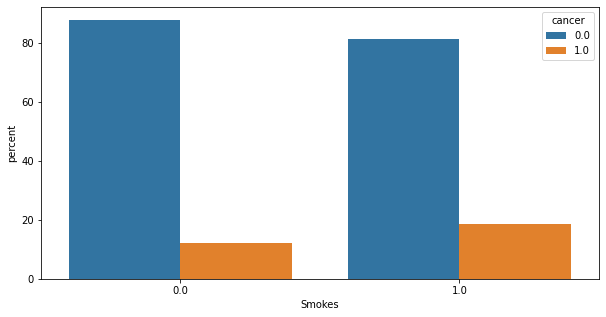

In [11]:
x,y = 'Smokes', 'cancer'

plt.figure(figsize=(10,5))
d=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
sns.barplot(x=d.Smokes, y=d.percent, hue= d.cancer)
plt.show()


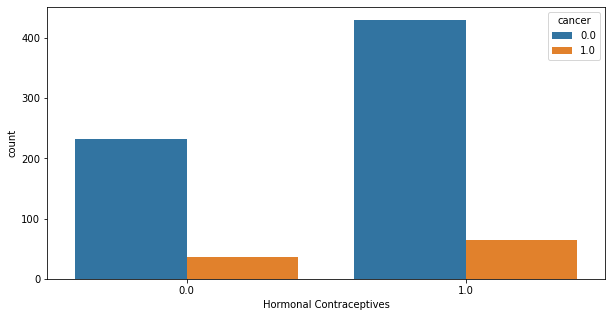

In [12]:
#Hormonal Contraceptives:

plt.figure(figsize=(10,5))
sns.countplot(x=df['Hormonal Contraceptives'], hue= df['cancer'])
plt.show()

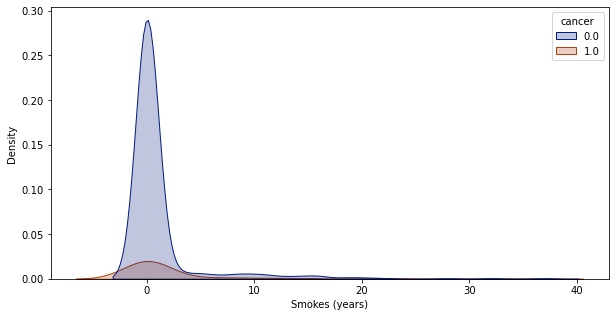

In [13]:
#Smokes (years):

plt.figure(figsize=(10,5))
#_=sns.histplot(x=df_nc['Smokes (years)'], color='b', alpha=0.6)
#_=sns.histplot(x=df_can['Smokes (years)'], color='r')
sns.kdeplot(x = 'Smokes (years)', hue = 'cancer', data = df, fill=True, palette="dark")
plt.show()

In [14]:
df_binary = df.loc[:,df.nunique() <=2]
df_nonbinary = df.loc[:,df.nunique() > 2]
df_binary.shape,df_nonbinary.shape

((763, 19), (763, 10))

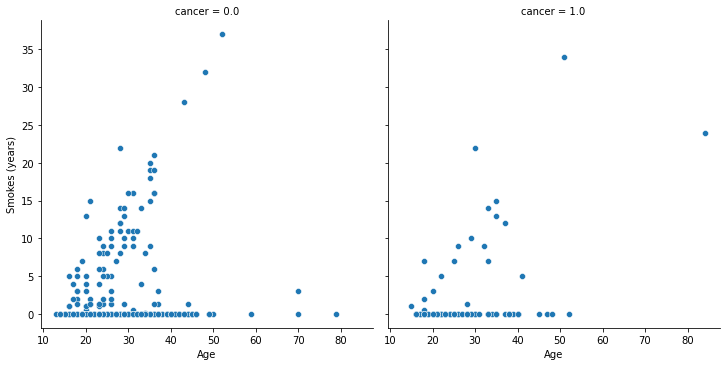

In [15]:
#Age vs Smokes per year leading to cervical cancer
sns.relplot(x = df['Age'], y = df ['Smokes (years)'], data = df, kind = 'scatter', col = df['cancer'])
plt.show()

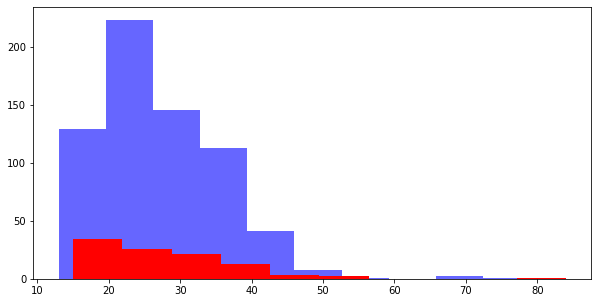

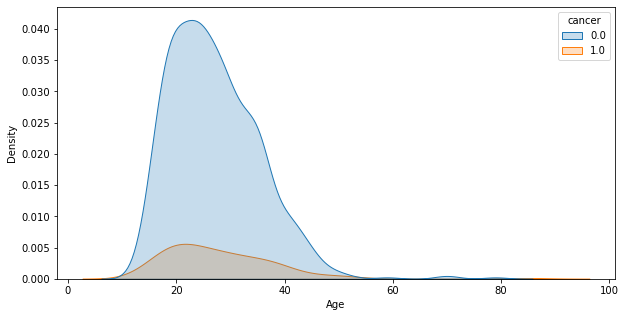

In [16]:
#age vs cancer distribution
plt.figure(figsize=(10,5))
_=plt.hist(df_nc['Age'], color='b', alpha=0.6)
_=plt.hist(df_can['Age'], color='r')
plt.show()


plt.figure(figsize=(10,5))
sns.kdeplot(x = 'Age', hue = 'cancer', data = df, fill=True)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Smokes                              763 non-null    float64
 1   Hormonal Contraceptives             763 non-null    float64
 2   IUD                                 763 non-null    float64
 3   STDs                                763 non-null    float64
 4   STDs:condylomatosis                 763 non-null    float64
 5   STDs:vaginal condylomatosis         763 non-null    float64
 6   STDs:vulvo-perineal condylomatosis  763 non-null    float64
 7   STDs:syphilis                       763 non-null    float64
 8   STDs:pelvic inflammatory disease    763 non-null    float64
 9   STDs:genital herpes                 763 non-null    float64
 10  STDs:molluscum contagiosum          763 non-null    float64
 11  STDs:HIV                            763 non-n

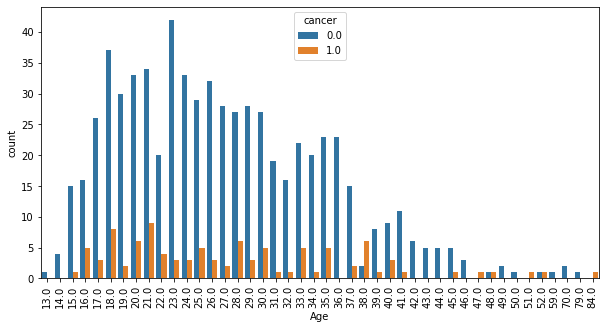

In [18]:
#age vs cancer countplots
plt.figure(figsize=(10,5))
sns.countplot(x = df['Age'], hue = df['cancer'], data =df )
plt.xticks(rotation=90)
plt.show()

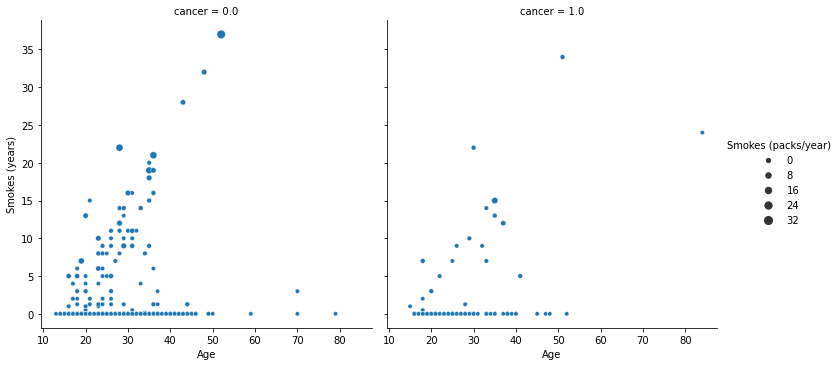

In [19]:
sns.relplot(x = df['Age'], y = df ['Smokes (years)'], data = df, kind = 'scatter',size = df['Smokes (packs/year)'], col = df['cancer'])
plt.show()

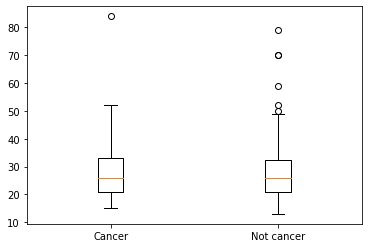

<Figure size 720x720 with 0 Axes>

In [20]:
fig,ax=plt.subplots()
plt.figure(figsize = (10,10))
ax.boxplot([df_can['Age'],df_nc['Age']])
ax.set_xticklabels(["Cancer","Not cancer"])
plt.show()

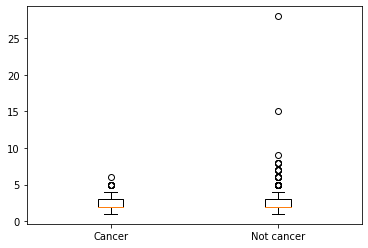

<Figure size 720x360 with 0 Axes>

In [21]:
#age vs cancer boxplots
fig,ax=plt.subplots()
plt.figure(figsize=(10,5))
ax.boxplot([df_can['Number of sexual partners'],df_nc['Number of sexual partners']],"")
ax.set_xticklabels(["Cancer","Not cancer"])
plt.show()

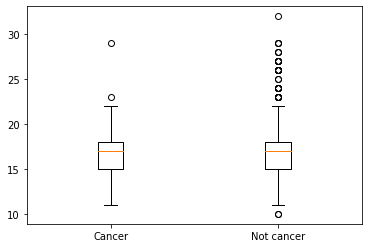

<Figure size 720x360 with 0 Axes>

In [22]:
#first sexual intercourse vs cancer boxplot
fig,ax=plt.subplots()
plt.figure(figsize = (10,5))
ax.boxplot([df_can['First sexual intercourse'],df_nc['First sexual intercourse']],"")
ax.set_xticklabels(["Cancer","Not cancer"])
plt.show()

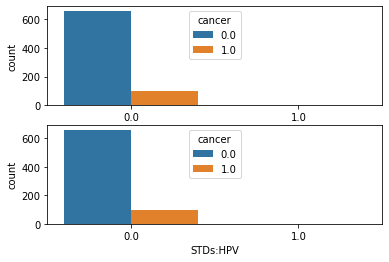

<Figure size 1440x1800 with 0 Axes>

In [23]:
#countplots of 2 different STDs with cancer
fig,ax = plt.subplots(2,1)
plt.figure(figsize=(20,25))
sns.countplot(x=df_binary['STDs:vaginal condylomatosis'], hue= df_binary['cancer'],ax = ax[0])
sns.countplot(x=df_binary['STDs:HPV'], hue= df_binary['cancer'],ax = ax[1])
plt.show()

In [24]:
#subsetting a dataframe with just cancer diagnosed patients
df_can_binary = df_can.loc[:,df_can.nunique() <=2]
df_can_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 6 to 760
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Smokes                              100 non-null    float64
 1   Hormonal Contraceptives             100 non-null    float64
 2   IUD                                 100 non-null    float64
 3   STDs                                100 non-null    float64
 4   STDs:condylomatosis                 100 non-null    float64
 5   STDs:vaginal condylomatosis         100 non-null    float64
 6   STDs:vulvo-perineal condylomatosis  100 non-null    float64
 7   STDs:syphilis                       100 non-null    float64
 8   STDs:pelvic inflammatory disease    100 non-null    float64
 9   STDs:genital herpes                 100 non-null    float64
 10  STDs:molluscum contagiosum          100 non-null    float64
 11  STDs:HIV                            100 non-n

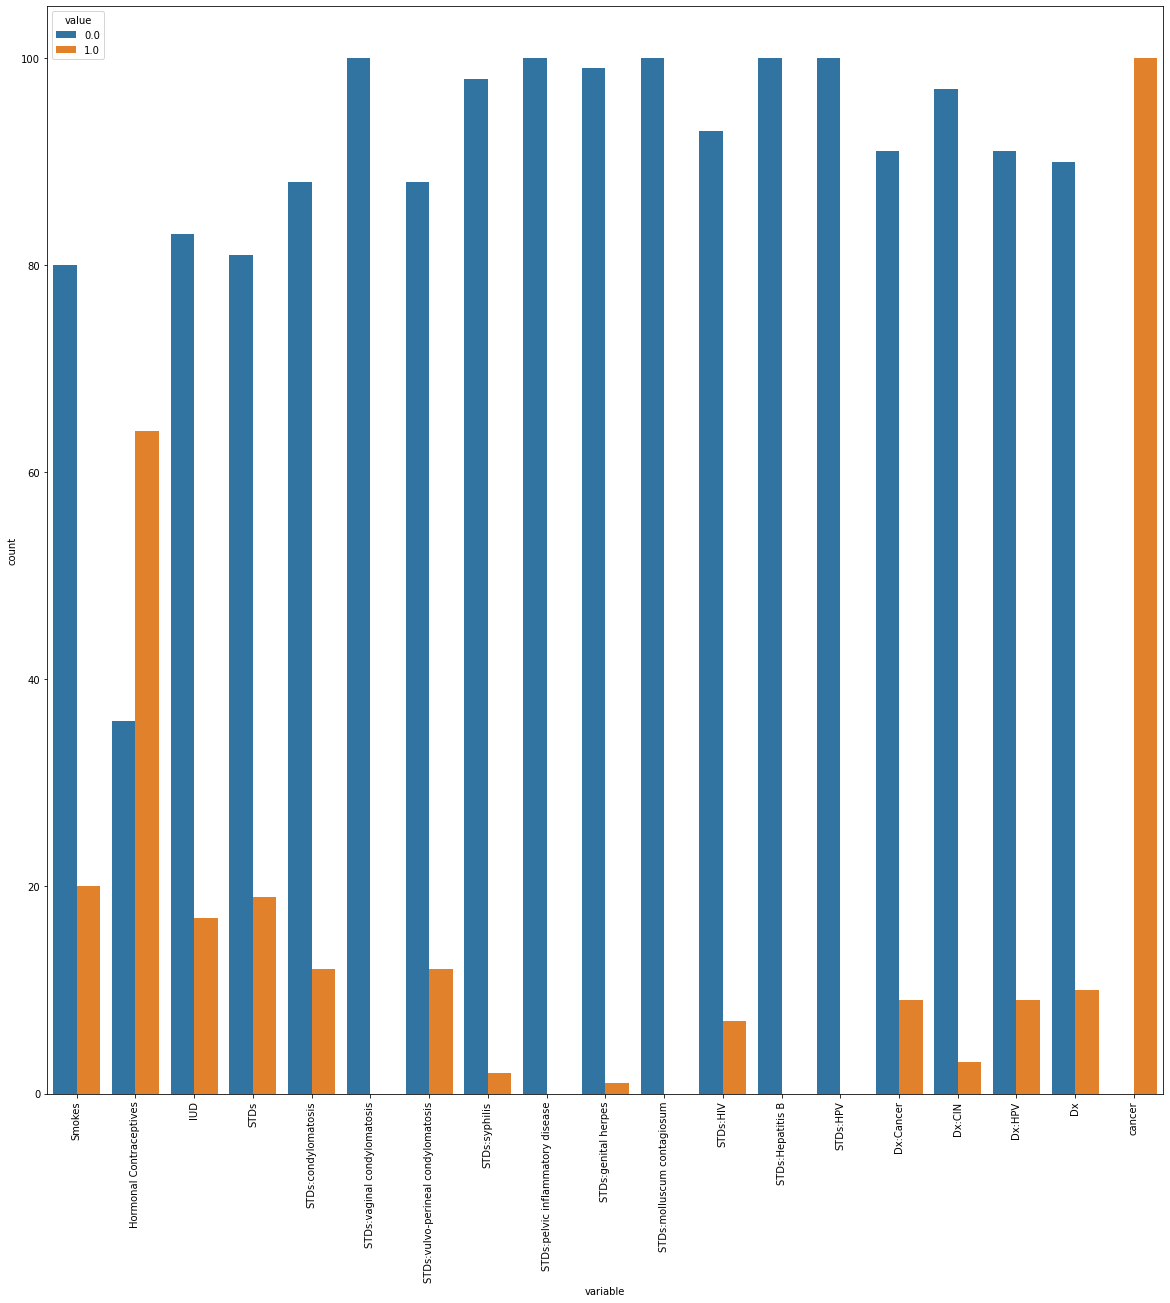

In [25]:
#countplot of diagnosed people with different binary risk factors
plt.figure(figsize=(20,20))
sns.countplot(x='variable',hue='value', data=pd.melt(df_can_binary))
plt.xticks(rotation=90)
plt.show()

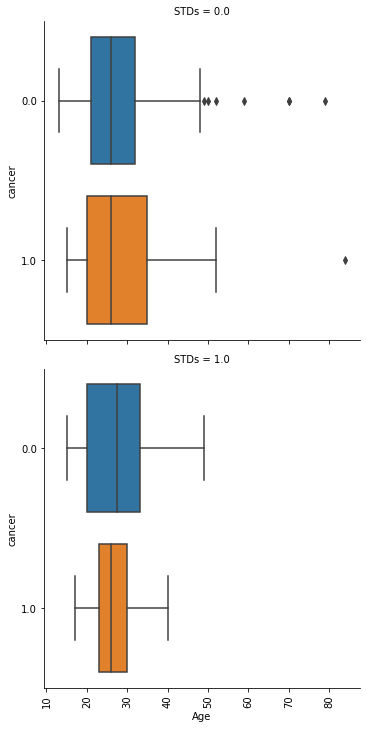

In [31]:
#boxplot of age, cancer and stds
ax = sns.catplot(x = "Age",y = "cancer", row = "STDs", data = df, kind ="box", orient = "h")
plt.xticks(rotation=90)
plt.show()

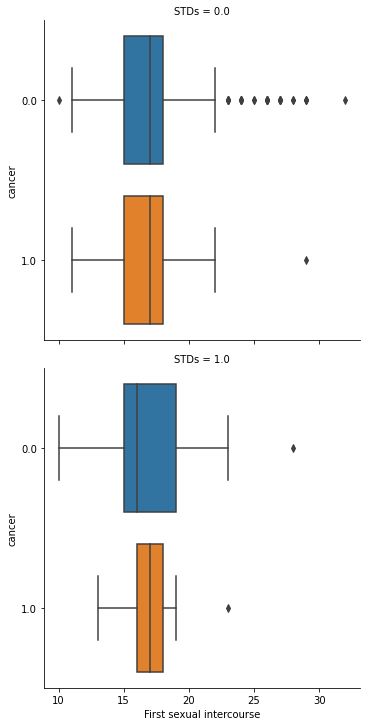

In [34]:
#boxplot of sexual intercourse vs cancer vs STDs
ax = sns.catplot(x = "First sexual intercourse",y = "cancer", row = "STDs", data = df, kind ="box", orient = "h")
plt.show()

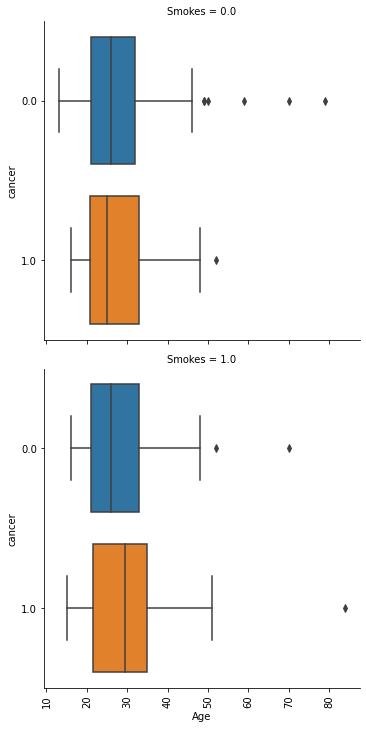

In [35]:
#age vs cancer vs smoking boxplot
ax = sns.catplot(x = "Age",y = "cancer", row = "Smokes", data = df, kind ="box", orient = "h")
plt.xticks(rotation=90)
plt.show()

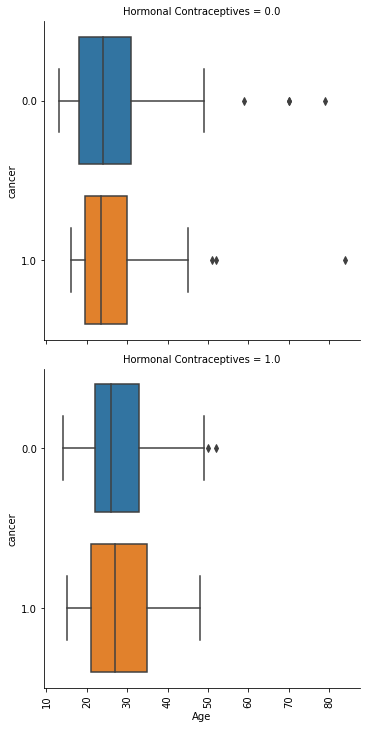

In [37]:
#age vs cancer vs usage of hormonal contraceptives boxplot
ax = sns.catplot(x = "Age",y = "cancer", row = "Hormonal Contraceptives", data = df, kind ="box", orient = "h")
plt.xticks(rotation=90)
plt.show()

**Some of the major factors to explore based on the EDA**
 - Diagnosis of STDs (whether diagnosed or not especially HPVs)
 - First sexual intercourse (age)
 - Age (since has a tendency to happen in women in their 30s from the boxplots)
 - Previously diagnosed or not 
 - Smokes
 - Usage of hormonal contraceptives